## **Projet:** Analyse Exploratoire des Données (Exploratory Data Analysis)
# *Analyse dataset de netflix*
# *G6-03*
**Realiser par: Driss Raki - Zakaria Karkouch - Achraf Assad - Houda Gmair - Nada Barir**

Importing all packages needed for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

Importing dataset in our case we used dataset directly from github

In [2]:
url = "https://raw.githubusercontent.com/EMSIMa/ADD3IIR/main/Projet/Datasets/netflix.csv"
df = pd.read_csv(url)

we used function head to show data from datased just to visualize data and take idea about what we working on

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


also we check if there this empty data before starting

In [4]:
df.director.isna().sum()

2634

clean this bad data for director

In [5]:
directors= df['director'].dropna()
directors.shape

(6173,)

## **Question 1 :**
After filtering director field we start handling this data to display top 10 realisateur and display result into diagram

<ipython-input-6-90002c01397e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director', y='Counts', data=top_directors_df, palette='magma')


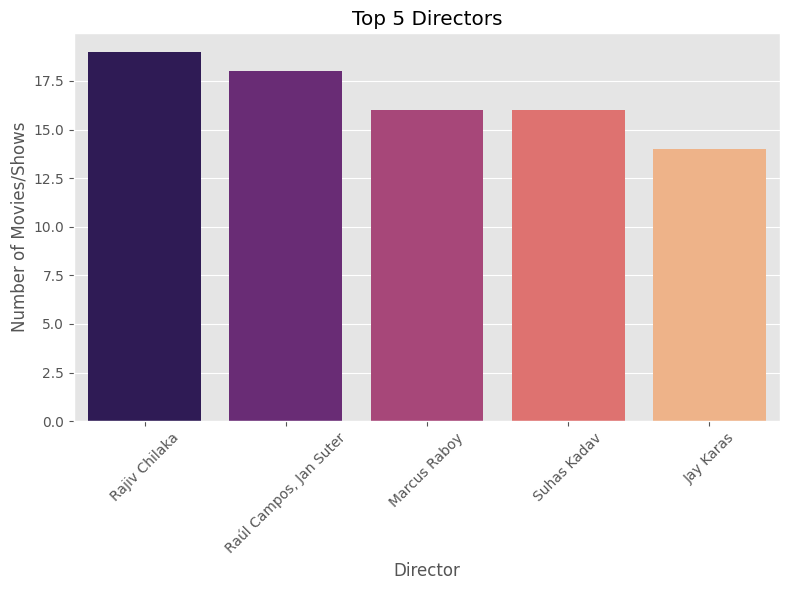

In [6]:
top_directors = df['director'].value_counts().nlargest(5)

# Convert the Series to DataFrame for plotting
top_directors_df = top_directors.reset_index()
top_directors_df.columns = ['Director', 'Counts']

# Creating the bar plot using the correct DataFrame format
plt.figure(figsize=(8, 6))
sns.barplot(x='Director', y='Counts', data=top_directors_df, palette='magma')
plt.title('Top 5 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies/Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Quesion 2 :**
Now we need to check if there is a bad data into listed in before starting anything

In [ ]:
df.listed_in.isna().sum()

0

<Axes: xlabel='listed_in'>

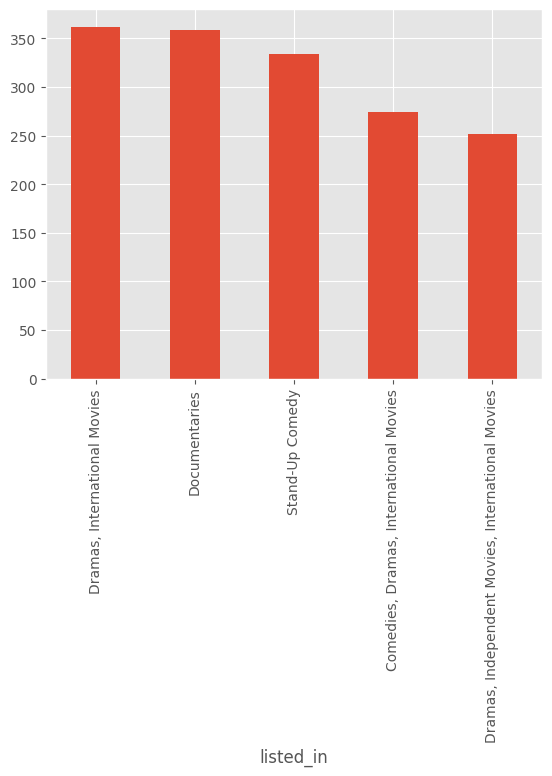

In [ ]:
# the data cleaned and we can start
categories_count = df["listed_in"].value_counts()
# print(categories_count)
categories_count.head(5).plot(kind='bar',stacked= True)
# categories_count.head(5)

# **Question 3 :**
top 10 acteurs in this dataset

In [ ]:
# cleaned cast also
df.cast.isna().sum()


825

cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Craig Sechler                                                                                                              6
Kevin Hart                                                                                                                 6
David Spade, London Hughes, Fortune Feimster                                                                               6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath  

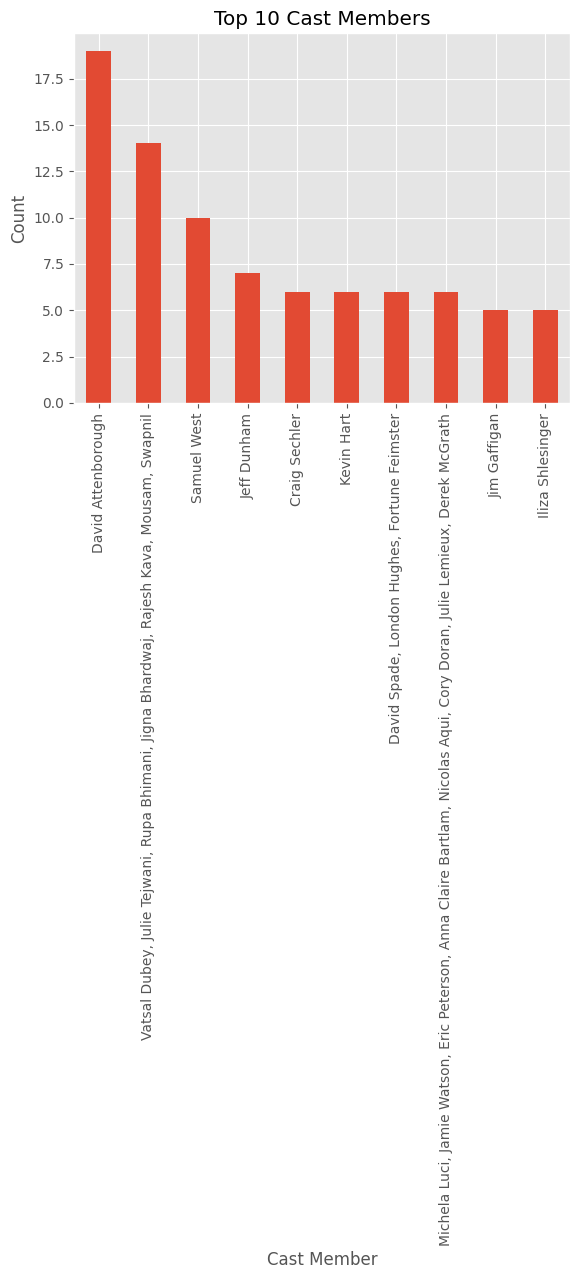

In [18]:
casts = df['cast'].dropna()
cast_counts = casts.value_counts()
top_10_cast = cast_counts.head(10)
print(top_10_cast)
top_10_cast.plot(kind='bar', x='cast', y='count', legend=False)
plt.title("Top 10 Cast Members")
plt.xlabel("Cast Member")
plt.ylabel("Count")
plt.show()

## **Question 4 :**
Les cinq meilleures series televisees avec le plus grand nombre de saisons

In [12]:
df = df.dropna(subset=['duration', 'type'])
res = df[df['type'] == 'TV Show'].sort_values(by='duration', ascending=False).head(5)
res

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1480,s1481,TV Show,Still Game,NaN,"Ford Kiernan, Paul Riley, Jane McCarry, Greg H...",United Kingdom,"December 30, 2020",2018,TV-14,9 Seasons,"British TV Shows, Classic & Cult TV, Internati...",Scottish pensioners Jack and Victor make the m...
6504,s6505,TV Show,Club Friday The Series 6,NaN,"Puttichai Kasetsin, Kongtoranin Lalana, Preech...",NaN,"March 9, 2019",2015,TV-MA,9 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Based on a Thai radio show that gives love adv...
67,s68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,"September 15, 2021",1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za..."
1998,s1999,TV Show,Call the Midwife,Philippa Lowthorpe,"Vanessa Redgrave, Bryony Hannah, Helen George,...",United Kingdom,"September 15, 2020",2020,TV-MA,9 Seasons,"British TV Shows, International TV Shows, TV D...",This period drama set in impoverished East Lon...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


#  **Question 5 :**
to display similar content based on listed_in and display top 10 into each 5 top categories

In [10]:
db = dict()
for selected_show_index in range(0, 5):
    selected_show_categories = set(df.at[selected_show_index, 'listed_in'])
    related_shows = df[df['listed_in'].apply(lambda x: bool(set(x).intersection(selected_show_categories)))]
    key = df.at[selected_show_index, 'title']
    values = related_shows['title'].head(10).tolist()
    db[key] = values

related = pd.DataFrame(db)
related

,Dick Johnson Is Dead,Blood & Water,Ganglands,Jailbirds New Orleans,Kota Factory
0,Dick Johnson Is Dead,Dick Johnson Is Dead,Dick Johnson Is Dead,Dick Johnson Is Dead,Dick Johnson Is Dead
1,Blood & Water,Blood & Water,Blood & Water,Blood & Water,Blood & Water
2,Ganglands,Ganglands,Ganglands,Ganglands,Ganglands
3,Jailbirds New Orleans,Jailbirds New Orleans,Jailbirds New Orleans,Jailbirds New Orleans,Jailbirds New Orleans
4,Kota Factory,Kota Factory,Kota Factory,Kota Factory,Kota Factory
5,Midnight Mass,Midnight Mass,Midnight Mass,Midnight Mass,Midnight Mass
6,My Little Pony: A New Generation,My Little Pony: A New Generation,My Little Pony: A New Generation,My Little Pony: A New Generation,My Little Pony: A New Generation
7,Sankofa,Sankofa,Sankofa,Sankofa,Sankofa
8,The Great British Baking Show,The Great British Baking Show,The Great British Baking Show,The Great British Baking Show,The Great British Baking Show
9,The Starling,The Starling,The Starling,The Starling,The Starling


# **Question 6 :**
we have sorted data based from the old to new based

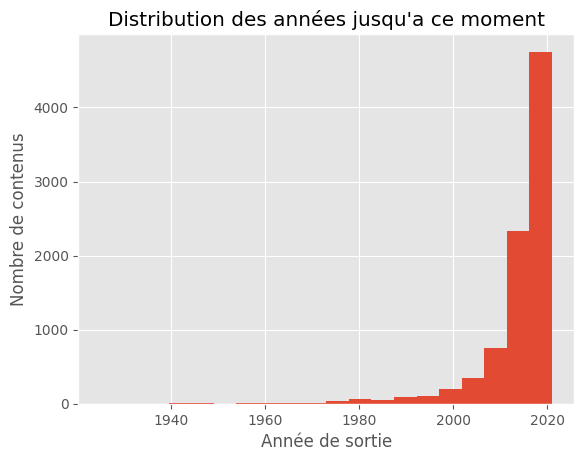


Nombre de contenus par type :
type
Movie      6128
TV Show    2676
Name: count, dtype: int64


In [15]:
df['release_year'].hist(bins=20)
plt.title("Distribution des années jusqu'a ce moment")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de contenus")
plt.show()

content_types_count = df["type"].value_counts()
print("\nNombre de contenus par type :")
print(content_types_count)

# **la fin de notre projet Merci pour votre Attention**